In [15]:
import numpy as np
import cvxpy as cp
import scipy as sc
import time
import pennylane as qml
import torch
import torch.nn as nn
import torch.nn.functional as Fn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import json
from utils import *

## 8 qubits

In [16]:
# パラメータを取得
config = load_config('/home/mitsukism/qiskit_entropy/vn_ent_qubits8_training_config.json')

qubits = config["qubits"]
num_wires = config["num_wires"]
num_layers = config["num_layers"]
N = config["N"]
seed = config["seed"]
num_shots = config["num_shots"]
num_of_epochs = config["num_of_epochs"]
learning_rate = config["learning_rate"]
num_of_samples = config["num_of_samples"]
dimension = config["dimension"]
hidden_layer = config["hidden_layer"]

In [17]:
device = qml.device("default.qubit", wires=num_wires)
density_matrix = np.zeros((N, N), dtype=np.complex128)

@qml.qnode(device)
def measure_rho(param, rotations=[qml.RX, qml.RY, qml.RZ]):
    obj_wires = range(qubits)

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.PauliZ(wires=0)
    qml.PauliX(wires=0)
    qml.PauliY(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[3, 4])
    qml.CNOT(wires=[7, 11])
    qml.CNOT(wires=[6, 15])
    qml.PauliX(wires=3)
    qml.PauliY(wires=4)
    qml.CNOT(wires=[5, 10])
    qml.CNOT(wires=[4, 12])

    # qml.RandomLayers(param, wires=obj_wires, rotations=rotations)
    result = qml.density_matrix(wires=obj_wires)
    return result

param_init = np.random.random(qml.RandomLayers.shape(n_layers=num_layers, n_rotations=3))
circuit_structure = generate_random_circuit_structure(qubits, num_wires, seed=seed)
# circuit_structure = load_circuit_structure_from_json('./circuit_structure.json')
density_matrix = measure_rho(param_init)
print(f"entropy: {calculate_entropy(density_matrix, N)}")

Random choice: 0.7739560485559633 (threshold: 0.7)
Random choice: 0.4388784397520523 (threshold: 0.7)
Random choice: 0.8585979199113825 (threshold: 0.7)
Random choice: 0.6973680290593639 (threshold: 0.7)
Random choice: 0.09417734788764953 (threshold: 0.7)
Random choice: 0.9756223516367559 (threshold: 0.7)
Random choice: 0.761139701990353 (threshold: 0.7)
Random choice: 0.7860643052769538 (threshold: 0.7)
Random choice: 0.12811363267554587 (threshold: 0.7)
Random choice: 0.45038593789556713 (threshold: 0.7)
Random choice: 0.37079802423258124 (threshold: 0.7)
Random choice: 0.9267649888486018 (threshold: 0.7)
Random choice: 0.6438651200806645 (threshold: 0.7)
Random choice: 0.82276161327083 (threshold: 0.7)
Random choice: 0.44341419882733113 (threshold: 0.7)
Random choice: 0.2272387217847769 (threshold: 0.7)
Random choice: 0.5545847870158348 (threshold: 0.7)
Random choice: 0.06381725610417532 (threshold: 0.7)
Random choice: 0.8276311719925821 (threshold: 0.7)
Random choice: 0.63166439912

/home/mitsukism/myenv/lib/python3.12/site-packages/scipy/linalg/_matfuncs.py:200: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)


entropy: 4.852030263919616


(<Figure size 1100x1300 with 1 Axes>, <Axes: >)

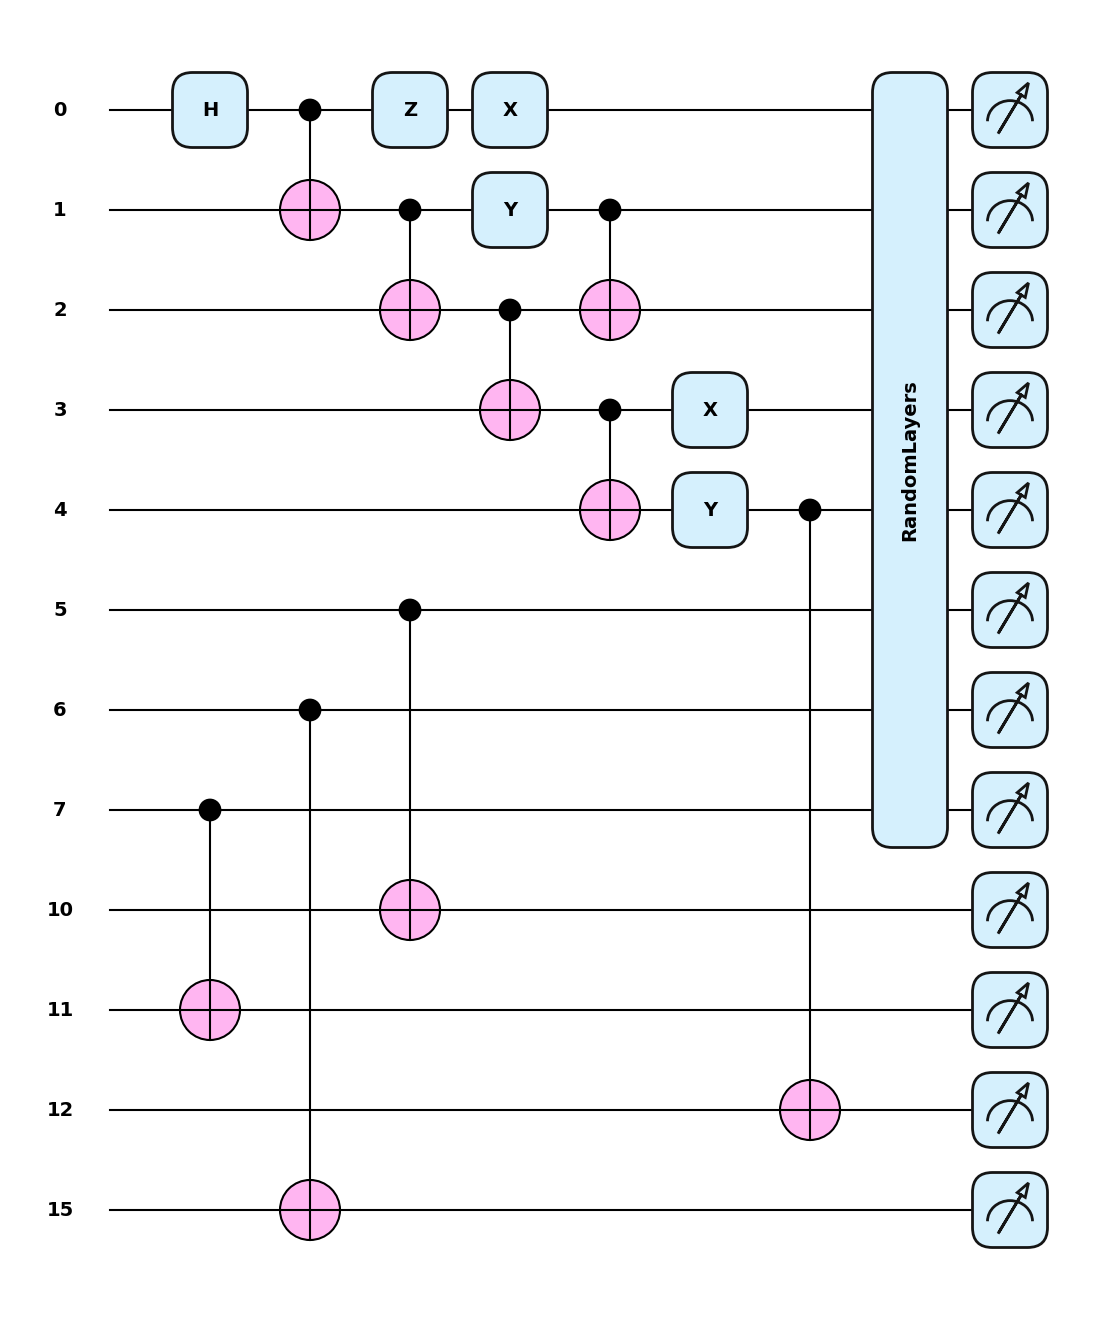

In [18]:
device = qml.device("default.qubit", wires=num_wires, shots=num_shots)
@qml.qnode(device)
def measure_rho(param, rotations=[qml.RX, qml.RY, qml.RZ]):
    obj_wires = range(qubits)

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.PauliZ(wires=0)
    qml.PauliX(wires=0)
    qml.PauliY(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[3, 4])
    qml.CNOT(wires=[7, 11])
    qml.CNOT(wires=[6, 15])
    qml.PauliX(wires=3)
    qml.PauliY(wires=4)
    qml.CNOT(wires=[5, 10])
    qml.CNOT(wires=[4, 12])

    qml.RandomLayers(param, wires=obj_wires, rotations=rotations)

    result = qml.state()
    return result

qml.drawer.use_style("pennylane")
qml.draw_mpl(measure_rho)(param_init)

In [9]:
circuit_structure

[{'gate': 'PauliZ', 'wires': [5]},
 {'gate': 'CNOT', 'wires': [0, 3]},
 {'gate': 'PauliY', 'wires': [1]},
 {'gate': 'CNOT', 'wires': [13, 4]},
 {'gate': 'CNOT', 'wires': [14, 4]},
 {'gate': 'PauliZ', 'wires': [5]},
 {'gate': 'PauliZ', 'wires': [5]},
 {'gate': 'PauliZ', 'wires': [6]},
 {'gate': 'CNOT', 'wires': [15, 10]},
 {'gate': 'CNOT', 'wires': [6, 6]},
 {'gate': 'CNOT', 'wires': [6, 13]},
 {'gate': 'PauliX', 'wires': [0]},
 {'gate': 'CNOT', 'wires': [5, 0]},
 {'gate': 'PauliY', 'wires': [3]},
 {'gate': 'CNOT', 'wires': [12, 11]},
 {'gate': 'CNOT', 'wires': [11, 7]},
 {'gate': 'CNOT', 'wires': [11, 2]},
 {'gate': 'CNOT', 'wires': [14, 8]},
 {'gate': 'PauliZ', 'wires': [4]},
 {'gate': 'CNOT', 'wires': [7, 11]},
 {'gate': 'PauliZ', 'wires': [0]},
 {'gate': 'CNOT', 'wires': [2, 6]},
 {'gate': 'PauliY', 'wires': [1]},
 {'gate': 'PauliX', 'wires': [3]}]

In [19]:
device = qml.device("default.qubit", wires=num_wires, shots=num_shots)
@qml.qnode(device)
def measure_rho(param, qubits, rotations=[qml.RX, qml.RY, qml.RZ]):
    obj_wires = range(qubits)

    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.PauliZ(wires=0)
    qml.PauliX(wires=0)
    qml.PauliY(wires=1)
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[3, 4])
    qml.CNOT(wires=[7, 11])
    qml.CNOT(wires=[6, 15])
    qml.PauliX(wires=3)
    qml.PauliY(wires=4)
    qml.CNOT(wires=[5, 10])
    qml.CNOT(wires=[4, 12])

    qml.RandomLayers(param, wires=obj_wires, rotations=rotations)

    result = [qml.sample(qml.PauliZ(i)) for i in range(len(obj_wires))]
    return result

circuit_structure = load_circuit_structure_from_json('/home/mitsukism/qiskit_entropy/circuit_structure_qubits8.json')
print(f"pauliz measurement: {measure_rho(param_init, qubits)}")

pauliz measurement: [array([1., 1., 1., ..., 1., 1., 1.]), array([ 1., -1., -1., ..., -1., -1., -1.]), array([-1., -1., -1., ..., -1., -1., -1.]), array([ 1., -1., -1., ..., -1., -1., -1.]), array([ 1.,  1., -1., ..., -1., -1., -1.]), array([1., 1., 1., ..., 1., 1., 1.]), array([ 1., -1., -1., ...,  1., -1., -1.]), array([ 1., -1., -1., ..., -1., -1., -1.])]


In [20]:
class neural_function(nn.Module):
    def __init__(self,dimension,hidden_layer):
        super(neural_function, self).__init__()

        self.dimension = dimension
        self.hidden_layer = hidden_layer
        self.lin1 = nn.Linear(self.dimension, self.hidden_layer)
        self.lin_end = nn.Linear(self.hidden_layer, 1)

    def forward(self, input):
        y = torch.sigmoid(self.lin1(input.float()))
        y = self.lin_end(y)

        return y

In [ ]:
num_trial = 10000

circuit_structure = load_circuit_structure_from_json('/home/mitsukism/qiskit_entropy/circuit_structure.json')
neural_fn = neural_function(dimension, hidden_layer)

for n_layer in [5, 7, 9, 11, 13, 15]:
    gradients_all_trials = np.zeros((num_trial, n_layer, 3))
    for idx in range(num_trial):
        start = time.time()
        param = np.random.random(qml.RandomLayers.shape(n_layers=n_layer, n_rotations=3))
        gradients = np.zeros(param.shape)
    
        for i in range(len(gradients)):
            for j in range(len(gradients[0])):
    
          # copy the parameters
                shifted = param.copy()
    
          # right shift the parameters
                shifted[i, j] += np.pi/2
    
          # forward evaluation
                result = measure_rho(shifted, qubits)
                sample_result_array = np.array(result).T
                nn_result = neural_fn(torch.from_numpy(sample_result_array))
                forward_sum = nn_result[:, 0].detach().numpy().sum() / num_of_samples
    
          # left shift the parameters
                shifted[i, j] -= np.pi
    
          # backward evaluation
                backward_sum = 0
                result = measure_rho(shifted, qubits)
                sample_result_array = np.array(result).T
                nn_result = neural_fn(torch.from_numpy(sample_result_array))
                backward_sum = nn_result[:, 0].detach().numpy().sum() / num_of_samples
    
          # parameter-shift rule
                gradients[i, j] = - 0.5 * (forward_sum - backward_sum)

        gradients_all_trials[idx] = gradients
        end = time.time()
        # save_file_path = f'/home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits10/gradients_qubits{qubits}_idx{idx}_layer{n_layer}.npy'
        # np.save(save_file_path, gradients)
        print(f'complete time: {end - start}, trial: {idx}, qubits: {qubits}, layers: {n_layer}')
    save_file_path = f'/home/mitsukism/qiskit_entropy/vn_net_gradients_bp/gradients/gradients_qubits{qubits}_layer{n_layer}.npy'
    np.save(save_file_path, gradients_all_trials)
    print("complete collecting samples of gradients, save data to ", save_file_path)

complete time: 0.3084847927093506, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx0_layer3.npy
complete time: 0.25815558433532715, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx1_layer3.npy
complete time: 0.30410075187683105, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx2_layer3.npy
complete time: 0.31267642974853516, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx3_layer3.npy
complete time: 0.550452709197998, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx4_layer3.npy
complete time: 0.24764561653137207, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx5_layer3.npy
complete time: 0.25043749809265137, save: /home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_qubits8_idx6_layer3.npy
complete time: 0.3256192207336426, save: /home/mitsukism/q

In [ ]:
num_trial = 10000
gradients_all_trials = np.zeros((num_trial, 3, 3))  # 10000, 3, 3 の配列を作成

circuit_structure = load_circuit_structure_from_json('/home/mitsukism/qiskit_entropy/circuit_structure_qubits8.json')
neural_fn = neural_function(dimension, hidden_layer)

for idx in range(num_trial):
    start = time.time()
    param = np.random.random(qml.RandomLayers.shape(n_layers=num_layers, n_rotations=3))
    gradients = np.zeros(param.shape)

    for i in range(len(gradients)):
        for j in range(len(gradients[0])):

            # copy the parameters
            shifted = param.copy()

            # right shift the parameters
            shifted[i, j] += np.pi/2

            # forward evaluation
            result = measure_rho(shifted, qubits)
            sample_result_array = np.array(result).T
            nn_result = neural_fn(torch.from_numpy(sample_result_array))
            forward_sum = nn_result[:, 0].detach().numpy().sum() / num_of_samples

            # left shift the parameters
            shifted[i, j] -= np.pi

            # backward evaluation
            backward_sum = 0
            result = measure_rho(shifted, qubits)
            sample_result_array = np.array(result).T
            nn_result = neural_fn(torch.from_numpy(sample_result_array))
            backward_sum = nn_result[:, 0].detach().numpy().sum() / num_of_samples

            # parameter-shift rule
            gradients[i, j] = - 0.5 * (forward_sum - backward_sum)

    # 勾配をすべてのトライアルに保存
    gradients_all_trials[idx] = gradients

    end = time.time()
    print(f'complete time: {end - start}, idx: {idx}')

# すべてのトライアルが完了したら、1つのファイルに保存
save_file_path = '/home/mitsukism/qiskit_entropy/vn_net_gradients_bp/qubits8/gradients_all_trials.npy'
np.save(save_file_path, gradients_all_trials)
print(f'All gradients saved in: {save_file_path}')

In [21]:
#@title Optimization using Gradient Descent (with neural network)

# initialize the neural network and quantum circuit parameters
neural_fn = neural_function(dimension, hidden_layer)
param_init = np.random.random(qml.RandomLayers.shape(n_layers=num_layers, n_rotations=3))
# intialize the cost function store
cost_func_store = []

# start the training
for epoch in range(1, num_of_epochs):

  # evaluate the gradient with respect to the quantum circuit parameters
    gradients = np.zeros_like((param_init))

    for i in range(len(gradients)):
        for j in range(len(gradients[0])):

      # copy the parameters
            shifted = param_init.copy()

      # right shift the parameters
            shifted[i, j] += np.pi/2

      # forward evaluation
            forward_sum = 0
            result = measure_rho(shifted, qubits)
            for sample in range(num_of_samples):
                sample_result_array = np.array([result[q][sample] for q in range(dimension)])
                nn_result = neural_fn(torch.from_numpy(sample_result_array))
                forward_sum += nn_result[0].detach().numpy()

      # normalize the forward sum
            forward_sum = forward_sum/num_of_samples

      # left shift the parameters
            shifted[i, j] -= np.pi

      # backward evaluation
            backward_sum = 0
            result = measure_rho(shifted, qubits)
            for sample in range(num_of_samples):
                sample_result_array = np.array([result[q][sample] for q in range(dimension)])
                nn_result = neural_fn(torch.from_numpy(sample_result_array))
                backward_sum += nn_result[0].detach().numpy()

      # normalize the backward sum
            backward_sum = backward_sum/num_of_samples

      # parameter-shift rule
            gradients[i, j] = - 0.5 * (forward_sum - backward_sum)

    # save the gradients
    if epoch % 10 == 0:
      np.save(f"/home/mitsukism/qiskit_entropy/vn_net_gradients/qubits{qubits}/gradients_epoch{epoch}.npy", gradients)

  # first copy the quantum circuit parameters before updating it
    prev_param_init = param_init.copy()

  # update the quantum circuit parameters
    param_init -= learning_rate*gradients

  # evaluate the first term
    grad_w1 = torch.zeros_like(neural_fn.lin1.weight)
    grad_b1 = torch.zeros_like(neural_fn.lin1.bias)
    grad_w2 = torch.zeros_like(neural_fn.lin_end.weight)
    grad_b2 = torch.zeros_like(neural_fn.lin_end.bias)

    result = measure_rho(prev_param_init, qubits)
    for sample in range(num_of_samples):
        sample_result_array = np.array([result[q][sample] for q in range(dimension)])
        nn_result = neural_fn(torch.from_numpy(sample_result_array))
        nn_result.backward()
        grad_w1 += neural_fn.lin1.weight.grad*(1/num_of_samples)
        grad_b1 += neural_fn.lin1.bias.grad*(1/num_of_samples)
        grad_w2 += neural_fn.lin_end.weight.grad*(1/num_of_samples)
        grad_b2 += neural_fn.lin_end.bias.grad*(1/num_of_samples)
        neural_fn.lin1.weight.grad.zero_()
        neural_fn.lin1.bias.grad.zero_()
        neural_fn.lin_end.weight.grad.zero_()
        neural_fn.lin_end.bias.grad.zero_()

  # evaluate the second term
    grad_w1_2 = torch.zeros_like(neural_fn.lin1.weight.grad)
    grad_b1_2 = torch.zeros_like(neural_fn.lin1.bias.grad)
    grad_w2_2 = torch.zeros_like(neural_fn.lin_end.weight.grad)
    grad_b2_2 = torch.zeros_like(neural_fn.lin_end.bias.grad)

    for sample in range(num_of_samples):
        result = np.random.choice([-1, 1], size=dimension)
        nn_result = neural_fn(torch.from_numpy(result.flatten()))
        nn_result.backward()
        grad_w1_2 += (np.exp(nn_result[0].detach().numpy()))*neural_fn.lin1.weight.grad*(1/num_of_samples)
        grad_b1_2 += (np.exp(nn_result[0].detach().numpy()))*neural_fn.lin1.bias.grad*(1/num_of_samples)
        grad_w2_2 += (np.exp(nn_result[0].detach().numpy()))*neural_fn.lin_end.weight.grad*(1/num_of_samples)
        grad_b2_2 += (np.exp(nn_result[0].detach().numpy()))*neural_fn.lin_end.bias.grad*(1/num_of_samples)
        neural_fn.lin1.weight.grad.zero_()
        neural_fn.lin1.bias.grad.zero_()
        neural_fn.lin_end.weight.grad.zero_()
        neural_fn.lin_end.bias.grad.zero_()

  # evaluate the difference, i.e., the gradient

    nn_grad_W1 = grad_w1_2 - grad_w1
    nn_grad_b1 = grad_b1_2 - grad_b1
    nn_grad_W2 = grad_w2_2 - grad_w2
    nn_grad_b2 = grad_b2_2 - grad_b2

  # update the NN weights and normalize them
    with torch.no_grad():
        neural_fn.lin1.weight -= learning_rate*nn_grad_W1
        neural_fn.lin1.bias -= learning_rate*nn_grad_b1
        neural_fn.lin_end.weight -= learning_rate*nn_grad_W2
        neural_fn.lin_end.bias -= learning_rate*nn_grad_b2

  # evaluate the cost function at these parameters
    first_term = 0
    result = measure_rho(param_init, qubits)
    for sample in range(num_of_samples):
        sample_result_array = np.array([result[q][sample] for q in range(dimension)])
        nn_result = neural_fn(torch.from_numpy(sample_result_array))
        first_term += nn_result[0].detach().numpy()

  # normalize the cost sum
    first_term = first_term/num_of_samples

  # # Second term evaluation
    second_term = 0
    for sample in range(num_of_samples):
        result = np.random.choice([-1, 1], size=dimension)
        nn_result = neural_fn(torch.from_numpy(result.flatten()))
        second_term += np.exp(nn_result[0].detach().numpy())

  # normalize the second term sum
    second_term = second_term/num_of_samples

    # add the cost function to the store
    cost_func_store.append(np.log(N) - first_term + second_term - 1)

  # print the cost
    print(f"Epoch {epoch}, Cost: {np.log(N) - first_term + second_term - 1}")

Epoch 1, Cost: 5.596205751562811
Epoch 2, Cost: 5.587005545569159
Epoch 3, Cost: 5.580926306873508
Epoch 4, Cost: 5.5763033040321845
Epoch 5, Cost: 5.570990864999912
Epoch 6, Cost: 5.568087042996235
Epoch 7, Cost: 5.564506978791528
Epoch 8, Cost: 5.561822499808244
Epoch 9, Cost: 5.559616044840537
Epoch 10, Cost: 5.55643921972955
Epoch 11, Cost: 5.5535277425679785
Epoch 12, Cost: 5.551722141192056
Epoch 13, Cost: 5.549840148204885
Epoch 14, Cost: 5.545995316158928
Epoch 15, Cost: 5.544153125844471
Epoch 16, Cost: 5.541085115995206
Epoch 17, Cost: 5.538979885993845
Epoch 18, Cost: 5.537047723424382
Epoch 19, Cost: 5.53490563341523
Epoch 20, Cost: 5.5327908480017856
Epoch 21, Cost: 5.529916281659104
Epoch 22, Cost: 5.527313153389416
Epoch 23, Cost: 5.525536252402462
Epoch 24, Cost: 5.5224118538401505
Epoch 25, Cost: 5.5199134311567475
Epoch 26, Cost: 5.517562836632826
Epoch 27, Cost: 5.514613311280258
Epoch 28, Cost: 5.5124354836716725
Epoch 29, Cost: 5.509480387961812
Epoch 30, Cost: 5.5

In [ ]:
plt.plot(cost_func_store)